### Introduction

The main goal of this study is to analyze a dataset that contains crime reports in San Francisco between the years 2003 and 2018. This dataset has different information that can be taken into account for the project. The essential details are the location, date and resolution. Therefore, with the wide range of incident cateogries and geographic coverage, it offers insights into long-term crime trends and patterns. 

Our foucs is on the crime category of "UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE" since we would like to know how has evolved during the years and its presence during the week days and times of the day. In our opinion, since the incident is related with alcohol, we think that it might be more common during Fridays and Saturdays and at night. However, we should analyze the data to confirm these facts. Moreover, the location of where these crimes took place is also relevant.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calplot
import folium
import json
from folium.plugins import HeatMap, HeatMapWithTime
import seaborn as sns

from random import random

C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\2178037450.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data

In [2]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data_og = data.copy()

focus = 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE'

### Time-series / Bar chart

In [9]:
crime_data = data[data['Descript'] == focus]
print(crime_data['DayOfWeek'].value_counts().sort_index())

DayOfWeek
Friday       1427
Monday       1185
Saturday     1841
Sunday       1889
Thursday     1145
Tuesday      1098
Wednesday    1175
Name: count, dtype: int64


# Paula

C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\2862377526.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\2862377526.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour


TypeError: cannot unpack non-iterable Axes object

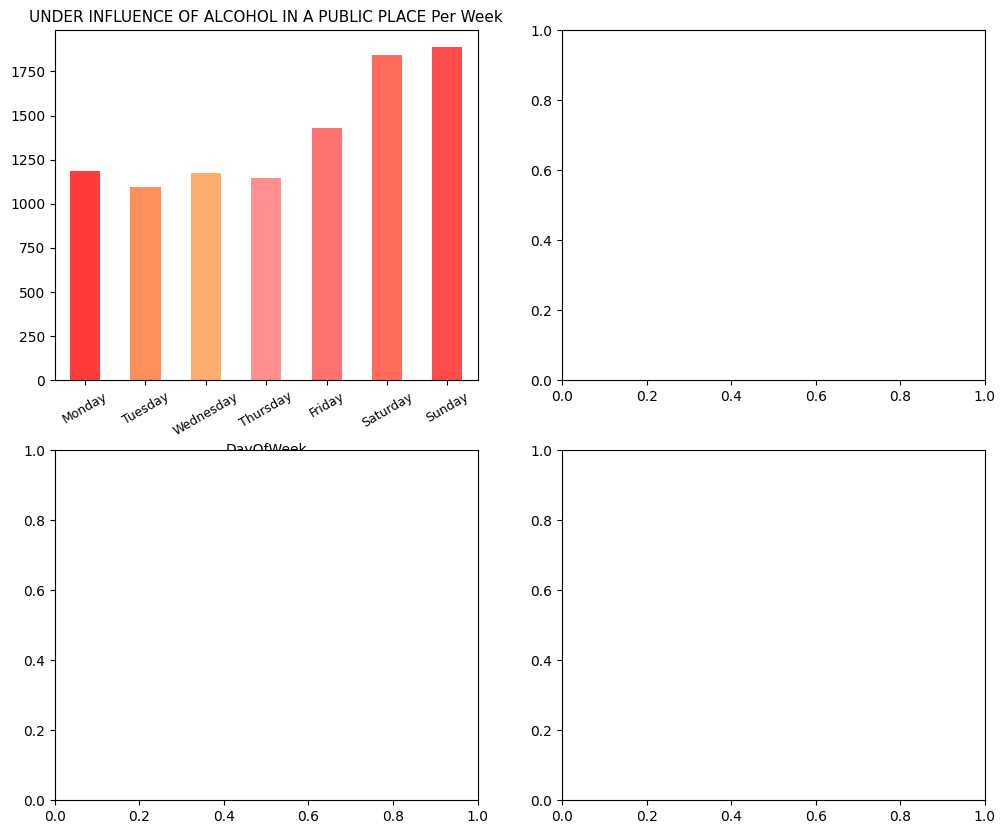

In [7]:
data = data_og.copy()
data['Date'] = pd.to_datetime(data['Date'])
colors = ["#ff3b3b", "#ff8f5a", "#ffac70", "#ff8f8f", "#ff7272", "#ff6c5c", "#ff4d4d"]
crime_data = data[data['Descript'] == focus]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Weekday bar plot in axes[0, 0]
crimes_per_weekday = crime_data['DayOfWeek'].value_counts().sort_index()

crimes_per_weekday = crimes_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

crimes_per_weekday.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_title(f'{focus} Per Week', fontsize=11)
# axes[0, 0].set_xlabel('Day of the Week', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=30, labelsize=9)

# Hours polar plot in axes[0, 1]
crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
crime_counts_by_hour = crime_data['hour'].value_counts().sort_index()

# ax = fig.add_subplot(axes[0, 1], polar=True)
fig2, ax = fig.add_subplot(axes[0, 1], polar=True)
ax.bar(crime_counts_by_hour.index * 2 * 3.14159 / 24, 
       crime_counts_by_hour.values, 
       width=2 * 3.14159 / 24,
       color='tomato',
       edgecolor='darkred', 
       linewidth=1.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)
ax.set_title(f'{focus} Per Hour')

# Calendar map in axes[1, 0] and axes[1, 1]
daily_counts = crime_data.groupby(pd.DatetimeIndex(crime_data['Date'])).count()

calplot.calplot(daily_counts, yearlabel_kws={'color': 'black'}, suptitle='Calendar Plot of the SF police - Specific Category',
                cmap='coolwarm', linecolor='w', linewidth=2, fillcolor='w', edgecolor='black')

# Other subplot functions
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

# Nerea

The one that works with only one year

C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\4283729541.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime_data_two_years = crime_data[data['Date'].dt.year >= current_year - 1]
C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\4283729541.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)


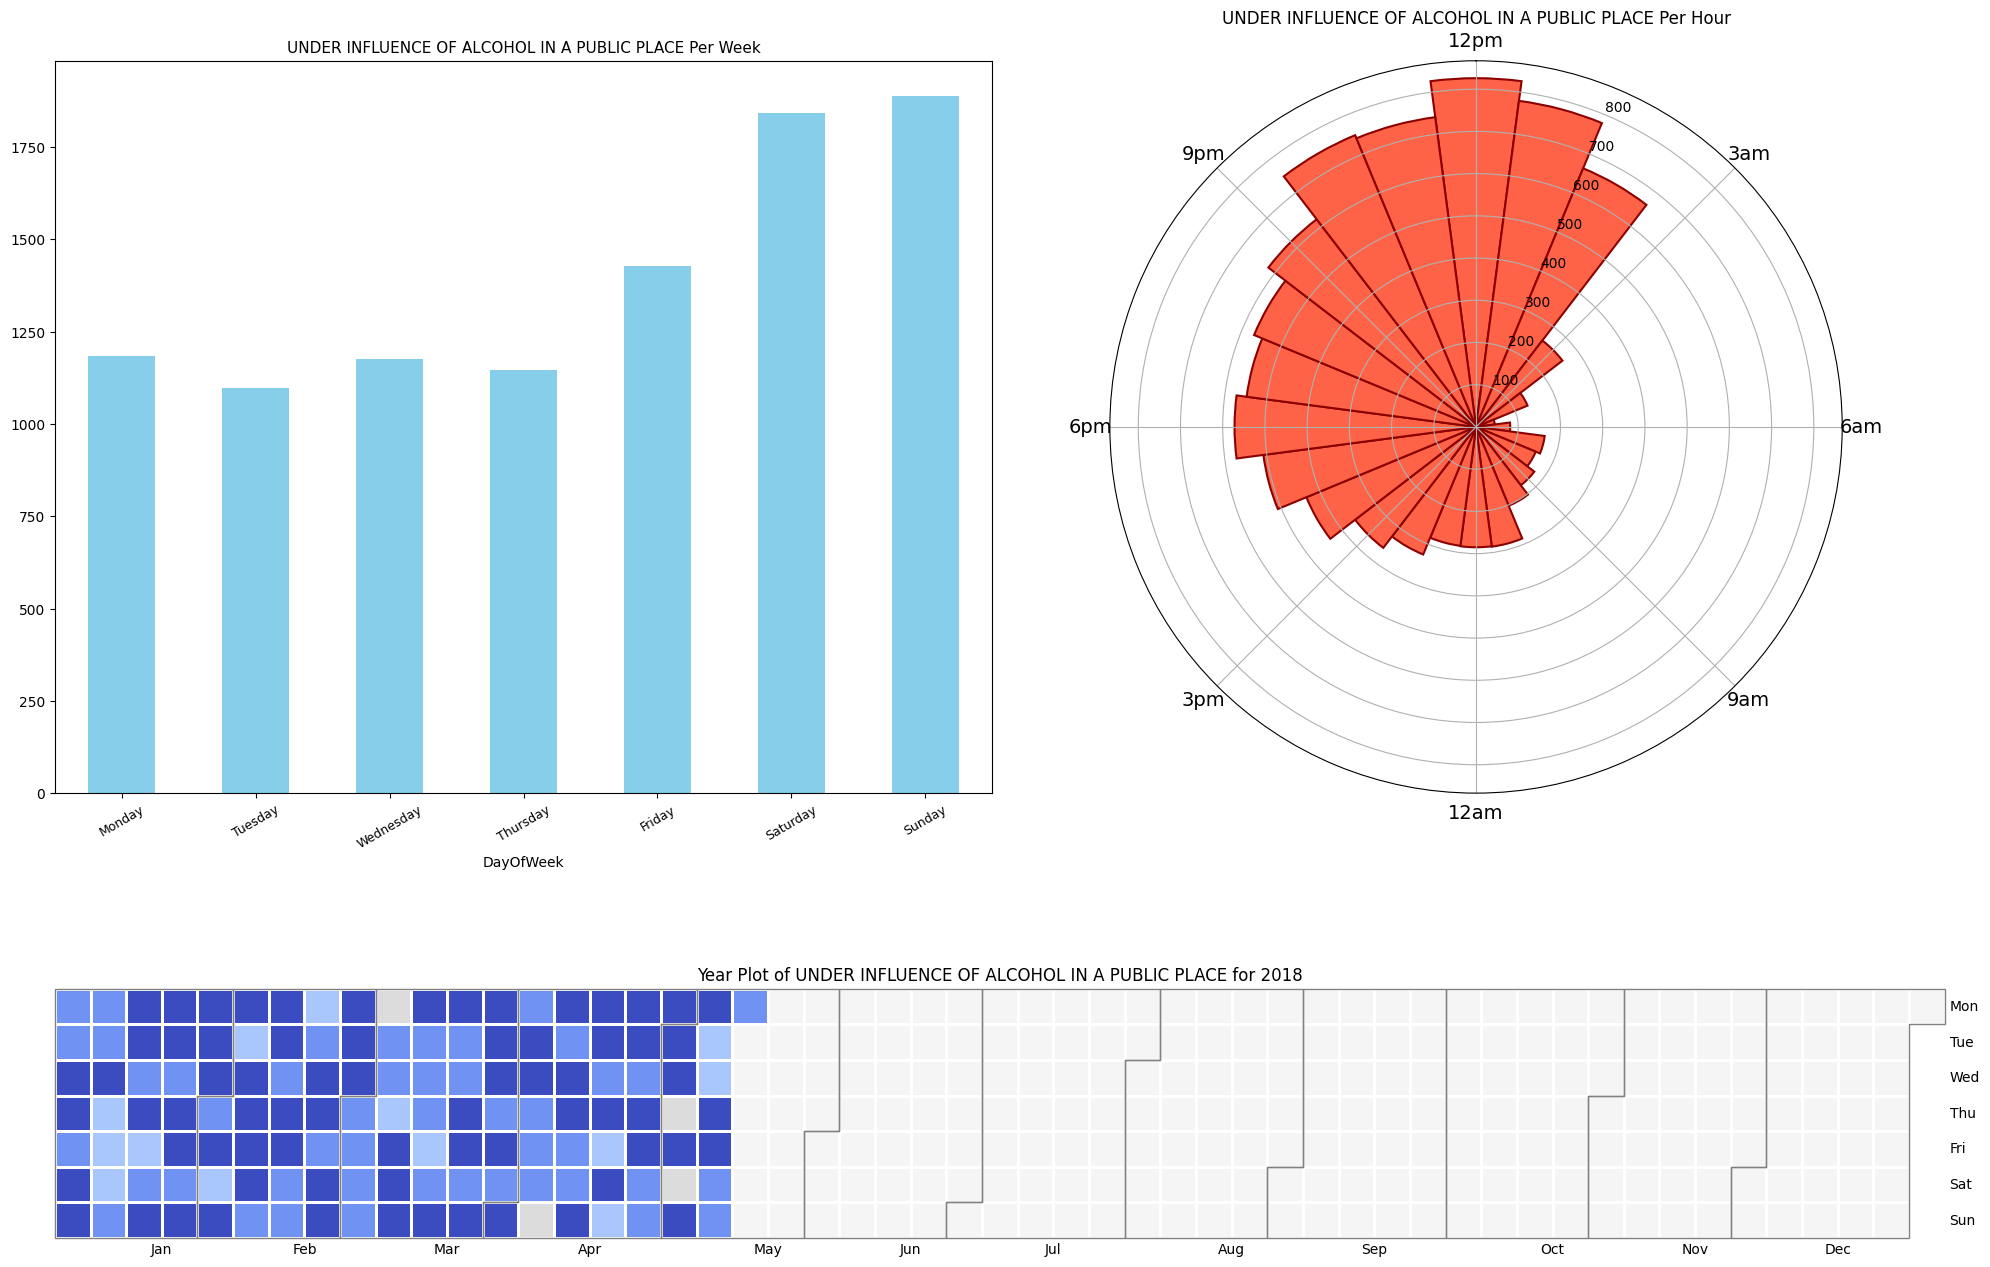

In [52]:
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
import calplot

data = data_og.copy()
data['Date'] = pd.to_datetime(data['Date'])
crime_data = data[data['Descript'] == focus]

# Filter data to include only the past two years
current_year = 2018
crime_data_two_years = crime_data[data['Date'].dt.year >= current_year - 1]

# Compute daily counts for the past two years
daily_counts_two_years = crime_data_two_years.groupby(pd.Grouper(key='Date', freq='D')).size()

# Set the size of the entire figure
plt.figure(figsize=(20, 15))

# Create a gridspec object
gs = gridspec.GridSpec(2, 2)

# Create subplots
axes = []
axes.append(plt.subplot(gs[0, 0]))  # Weekday bar plot
axes.append(plt.subplot(gs[0, 1], projection='polar'))  # Hours polar plot
axes.append(plt.subplot(gs[1, :]))  # Year plot (replacing calendar map)

# Weekday bar plot
crimes_per_weekday = crime_data['DayOfWeek'].value_counts().sort_index()
crimes_per_weekday = crimes_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crimes_per_weekday.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title(f'{focus} Per Week', fontsize=11)
axes[0].tick_params(axis='x', rotation=30, labelsize=9)

# Hours polar plot
ax = axes[1]
ax.bar(np.array(crime_counts_by_hour.index) * 2 * 3.14159 / 24, 
       np.array(crime_counts_by_hour.values), 
       width=2 * 3.14159 / 24,
       color='tomato',
       edgecolor='darkred', 
       linewidth=1.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)
ax.set_title(f'{focus} Per Hour')

# Year plot (replacing calendar map)
calplot.yearplot(daily_counts_two_years, year=current_year, ax=axes[2], cmap='coolwarm')
axes[2].set_title(f'Year Plot of {focus} for {current_year}')

plt.tight_layout()
plt.show()


Trying two years (it does not work)

C:\Users\nerea\AppData\Local\Temp\ipykernel_2932\1795378188.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)


TypeError: can only concatenate list (not "int") to list

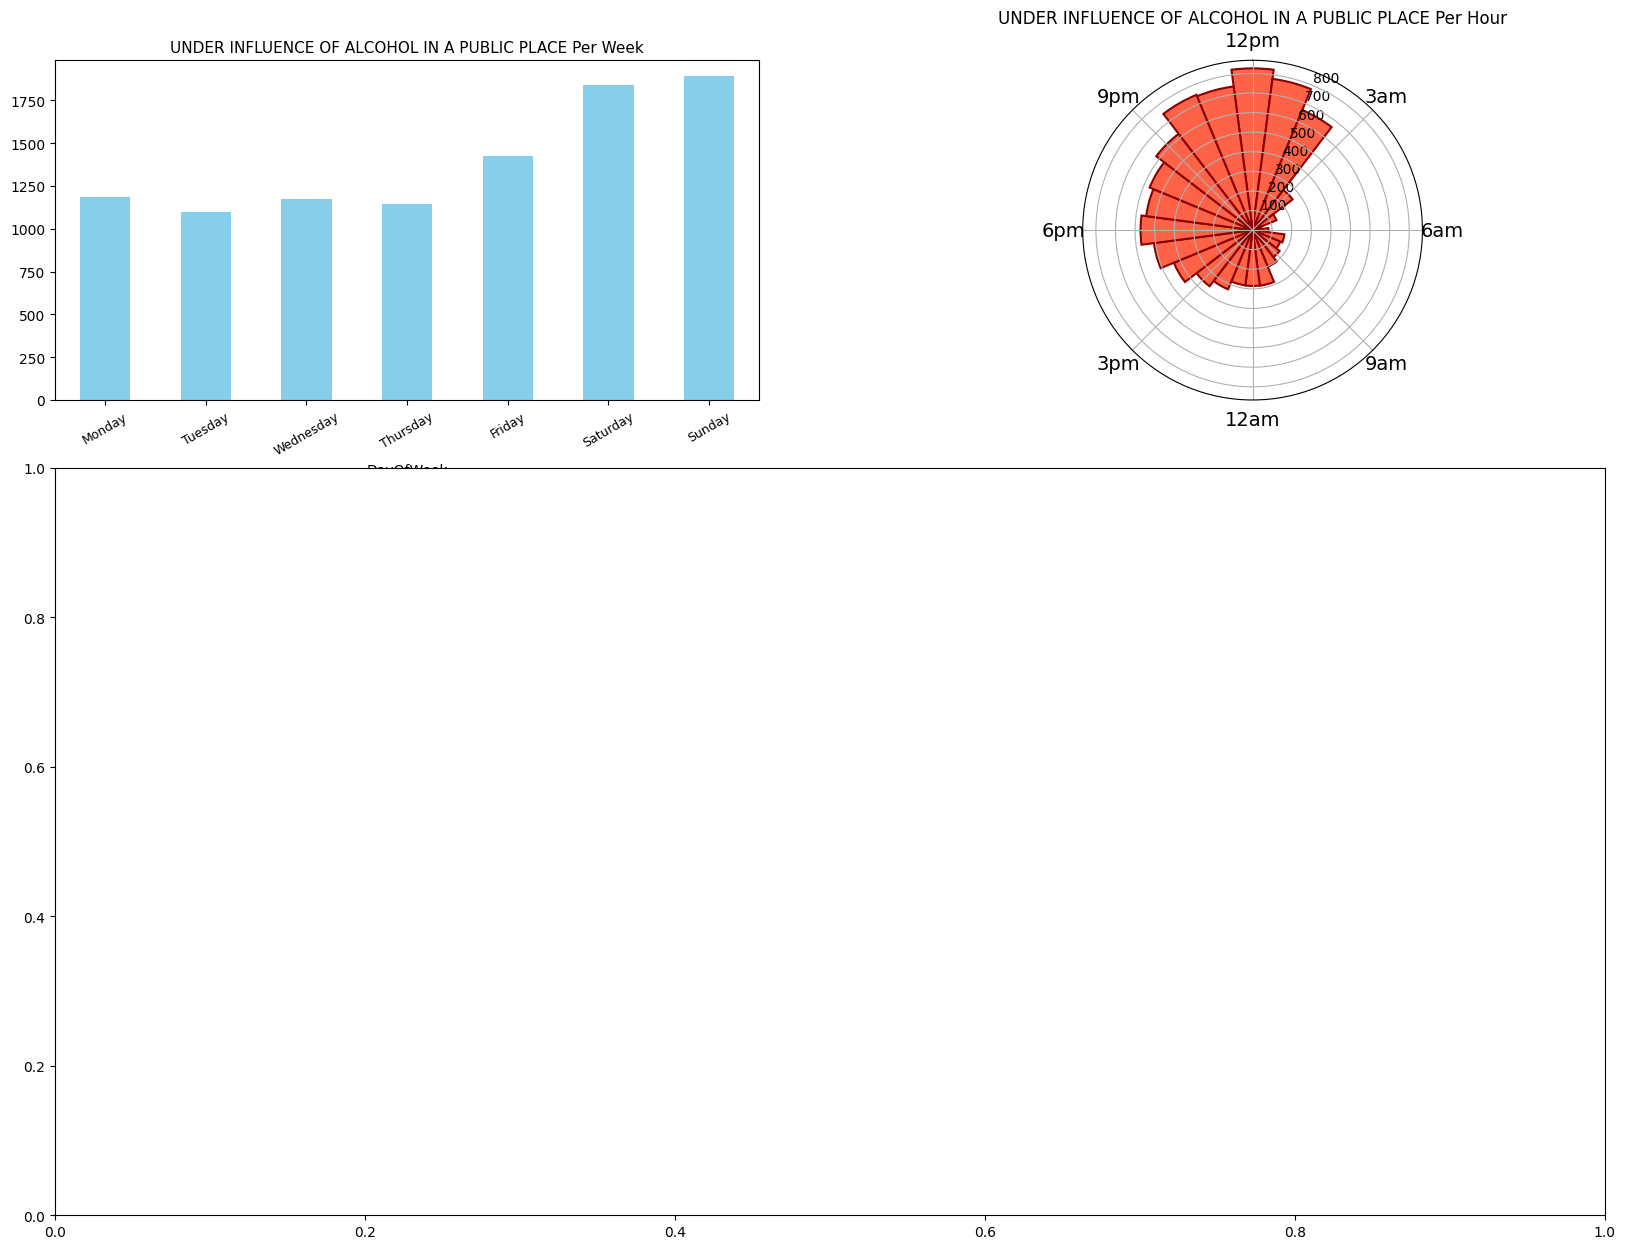

In [50]:
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
import calplot

data = data_og.copy()
data['Date'] = pd.to_datetime(data['Date'])
crime_data = data[data['Descript'] == focus]

# Filter data for years 2018 and 2003
crime_data_2018 = crime_data[crime_data['Date'].dt.year == 2018]
crime_data_2003 = crime_data[crime_data['Date'].dt.year == 2003]

daily_counts_2018 = crime_data_2018.groupby(pd.Grouper(key='Date', freq='D')).size()
daily_counts_2003 = crime_data_2003.groupby(pd.Grouper(key='Date', freq='D')).size()

# Combine daily counts for both years
combined_daily_counts = pd.concat([daily_counts_2003, daily_counts_2018])

# Set the size of the entire figure
plt.figure(figsize=(20, 15))

# Create a gridspec object
gs = gridspec.GridSpec(3, 2)

# Create subplots
axes = []
axes.append(plt.subplot(gs[0, 0]))  # Weekday bar plot
axes.append(plt.subplot(gs[0, 1], projection='polar'))  # Hours polar plot
axes.append(plt.subplot(gs[1:, :]))  # Combined Year plot (replacing calendar map)

# Weekday bar plot
crimes_per_weekday = crime_data['DayOfWeek'].value_counts().sort_index()
crimes_per_weekday = crimes_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crimes_per_weekday.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title(f'{focus} Per Week', fontsize=11)
axes[0].tick_params(axis='x', rotation=30, labelsize=9)

# Hours polar plot
ax = axes[1]
ax.bar(np.array(crime_counts_by_hour.index) * 2 * 3.14159 / 24, 
       np.array(crime_counts_by_hour.values), 
       width=2 * 3.14159 / 24,
       color='tomato',
       edgecolor='darkred', 
       linewidth=1.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)
ax.set_title(f'{focus} Per Hour')

# Combined Year plot (replacing calendar map) for both years
calplot.yearplot(combined_daily_counts, year=[2003, 2018], ax=axes[2], cmap='Spectral_r', colorbar=True)
axes[2].set_title(f'Calendar Plot of {focus} for 2003 and 2018')

plt.tight_layout()
plt.show()
